# Pandas para el análisis de datos en Python

*   NOMBRE: ***ANTONI JESSHUA GALEANA OCAMPO***


---

Se utiliza el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.


In [ ]:
# Conectamos el drive con el Jupyter
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.	Se descarga el archivo: `LaqnData.csv` y se guarda, en un dataframe (`air_df`), todos sus registros.
*   Se observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Se calcula el porcentaje de valores faltantes por columna.

In [ ]:
# Importacione de Pandas
import pandas as pd

# Para leer un archivo CSV desde mi drive
air_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA/CyAD/2-Module/Exercise/LaqnData.csv')

In [ ]:
# Shape
air_df.shape

(43800, 6)

In [ ]:
# Columns
air_df.columns

Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')

In [ ]:
# Head()
air_df.head(3)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R


In [ ]:
# Tail()
air_df.tail(3)

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


In [ ]:
# Tipos de datos
air_df.dtypes

Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object

In [ ]:
# Valores faltantes
air_df.isna().sum()

Site                          0
Species                       0
ReadingDateTime               0
Value                      3230
Units                         0
Provisional or Ratified       0
dtype: int64

In [ ]:
# Porcentaje de valores faltantes.
porcentajeNulos = (air_df.isna().mean()*100)
pd.DataFrame(porcentajeNulos)

,0
Site,0.000000
Species,0.000000
ReadingDateTime,0.000000
Value,7.374429
Units,0.000000
Provisional or Ratified,0.000000


In [ ]:
# Comprobación
porcentaje_faltante = (3230 / 43800) * 100
print(porcentaje_faltante)

7.374429223744292


2.	La cantidad de valores únicos por columna (`nunique()`) para ver:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

>Valores unicos

In [ ]:
# Cantidad de valores únicos por columna
air_df.nunique()

Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64

In [ ]:
# ¿Cuántas mediciones se hicieron?
print('¿Cuántas mediciones se hicieron?')
print('   Aunque air_df.nunique() marca, 8760 diferentes fechas, se tiene, 43800 muestras que corresponden al número de columnas\n')
print('¿Cuántos contaminantes del aire (Species) se analizaron?')
print('   Fuero: 5\n')
print('¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.')
print('   "La columna Site"  y "Provisional or Ratified"\n')

¿Cuántas mediciones se hicieron?
   Aunque air_df.nunique() marca, 8760 diferentes fechas, se tiene, 43800 muestras que corresponden al número de columnas

¿Cuántos contaminantes del aire (Species) se analizaron?
   Fuero: 5

¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
   "La columna Site"  y "Provisional or Ratified"



In [ ]:
# La columna Units tampoco posee valor informativo. Verifícalo con la función unique() y elimínala del dataframe.

# Cantidad de valores únicos por columna
print('Units pose :',air_df.Units.nunique(),'valores diferentes')

# Eliminación de las columnas "Site","Units" y "Provisional or Ratified"
air_df = air_df.drop(["Site","Units","Provisional or Ratified"], axis=1)

Units pose : 3 valores diferentes


In [ ]:
# Head()
air_df.head(100)

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
95,NO,04/01/2017 23:00,14.8
96,NO,05/01/2017 00:00,10.4
97,NO,05/01/2017 01:00,6.5
98,NO,05/01/2017 02:00,9.7


3.	Se realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y se determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [ ]:
# Conteo de valores por categoría
air_df['Species'].value_counts()

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64

In [ ]:
# Condición de coincidencia
if air_df['Species'].value_counts().sum() == 43800:
  print('Coincide')

Coincide


4.	Se utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [ ]:
air_df.groupby('Species').mean(numeric_only=True)

,Value
Species,
NO,15.045115
NO2,38.010185
NOX,61.078661
PM10,22.551704
PM2.5,14.999831


5.	El conjunto de datos está en un formato largo. Aplico la función `.pivot` para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [ ]:
# Formato largo
air_df.head(3)

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2


In [ ]:
# Formato ancho
pvt_df=air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
pvt_df.head(3)

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN


6.	A través de la función `describe()` se responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [ ]:
air_df.groupby('Species').describe().T

Species               NO          NO2          NOX         PM10        PM2.5
Value count  8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
      mean     15.045115    38.010185    61.078661    22.551704    14.999831
      std      26.678565    18.580841    54.584805    15.344755    13.558588
      min      -2.000000     2.800000     1.000000    -5.600000    -8.000000
      25%       3.100000    23.800000    30.300000    13.900000     7.000000
      50%       7.100000    35.300000    46.900000    19.500000    11.000000
      75%      15.500000    49.900000    73.800000    27.300000    18.000000
      max     401.799990   120.200000   734.299990   633.099980   128.000000

In [ ]:
#Pregunta
resulNO2 = air_df[air_df['Species'] == 'NO2']['Value'].idxmax()
# print(resulNO2)
print('¿Cuál es el mayor valor de NO2 registrado?')
print('Valor maximo:',air_df.at[resulNO2, 'Value'],'\n')
print('¿A qué día pertenece?')
print('Fecha:',air_df.at[resulNO2, 'ReadingDateTime'],'\n')
# air_df.iloc[resulNO2]

¿Cuál es el mayor valor de NO2 registrado?
Valor maximo: 120.2 

¿A qué día pertenece?
Fecha: 24/01/2017 19:00 



In [ ]:
#Pregunta
resulPM10 = air_df[air_df['Species'] == 'PM10']['Value'].idxmin()
# print(resulNO2)
print(' ¿Cuál es el menor valor de PM10 registrado?')
print('Valor menor:',air_df.at[resulPM10, 'Value'],'\n')
print('¿A qué día pertenece?')
print('Fecha:',air_df.at[resulPM10, 'ReadingDateTime'],'\n')
# air_df.iloc[resulPM10]

 ¿Cuál es el menor valor de PM10 registrado?
Valor menor: -5.6 

¿A qué día pertenece?
Fecha: 12/09/2017 23:00 



In [ ]:
print('¿Cuál es la mediana del NO? La mediana de NO es: 7.1')
print('¿Cómo se interpreta? La mediana de NO, que es de 7.1, indica que aproximadamente la mitad de los valores en el conjunto de datos de óxido de nitrógeno (NO) \n son iguales o inferiores a 7.1. Esta medida representa el punto central de la distribución de concentraciones de NO y sirve como referencia para comprender \n dónde se encuentra la ubicación central de los datos.')

¿Cuál es la mediana del NO? La mediana de NO es: 7.1
¿Cómo se interpreta? La mediana de NO, que es de 7.1, indica que aproximadamente la mitad de los valores en el conjunto de datos de óxido de nitrógeno (NO) 
 son iguales o inferiores a 7.1. Esta medida representa el punto central de la distribución de concentraciones de NO y sirve como referencia para comprender 
 dónde se encuentra la ubicación central de los datos.


In [ ]:
print('¿Cuál es el primer cuartil de PM2.5? Es: 7.0')
print('¿Qué significa? Quel conjunto de datos, el 25% de los valores son iguales o inferiores a 7.0. ')

¿Cuál es el primer cuartil de PM2.5? Es: 7.0
¿Qué significa? Quel conjunto de datos, el 25% de los valores son iguales o inferiores a 7.0. 


7.	Histograma para cada columna de `pvt_df`. Determinar ¿Qué contaminante tiene mayor variabilidad?

In [ ]:
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


<Axes: ylabel='Frequency'>

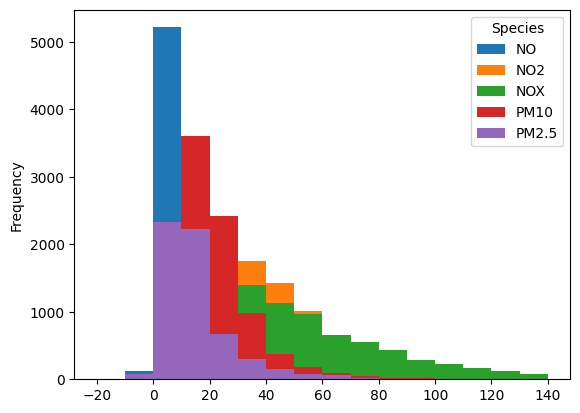

In [ ]:
import numpy as np
pvt_df.plot.hist(bins=np.arange(-20,150,10))
# pvt_df.plot.hist()

<ipython-input-70-ed9f132490eb>:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pvt_df.hist(alpha=0.8, bins=20, range=[-9, 200], ax=ax, color=color)


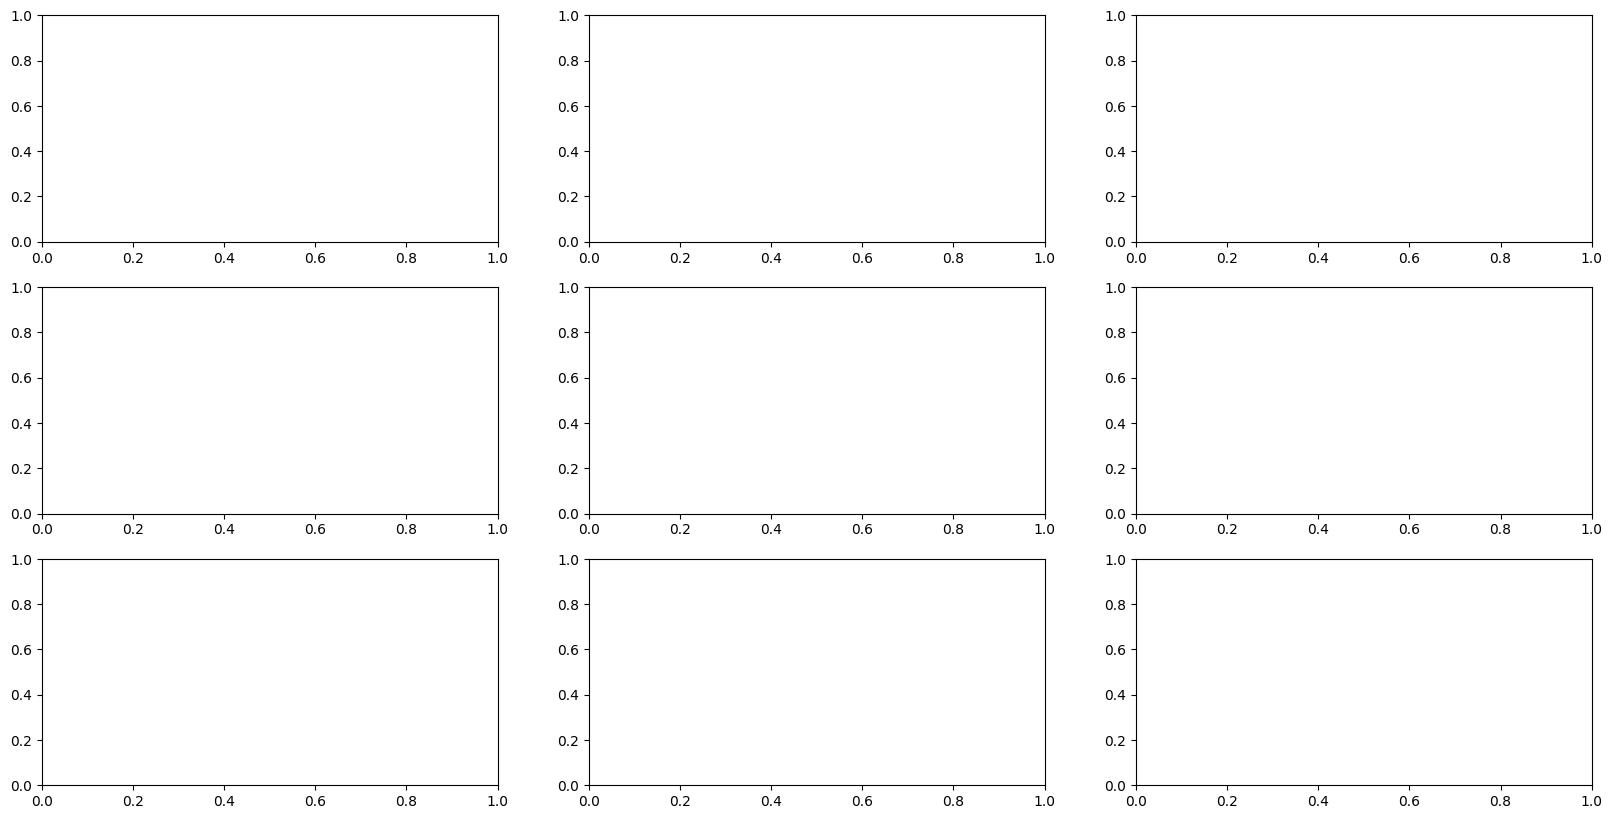

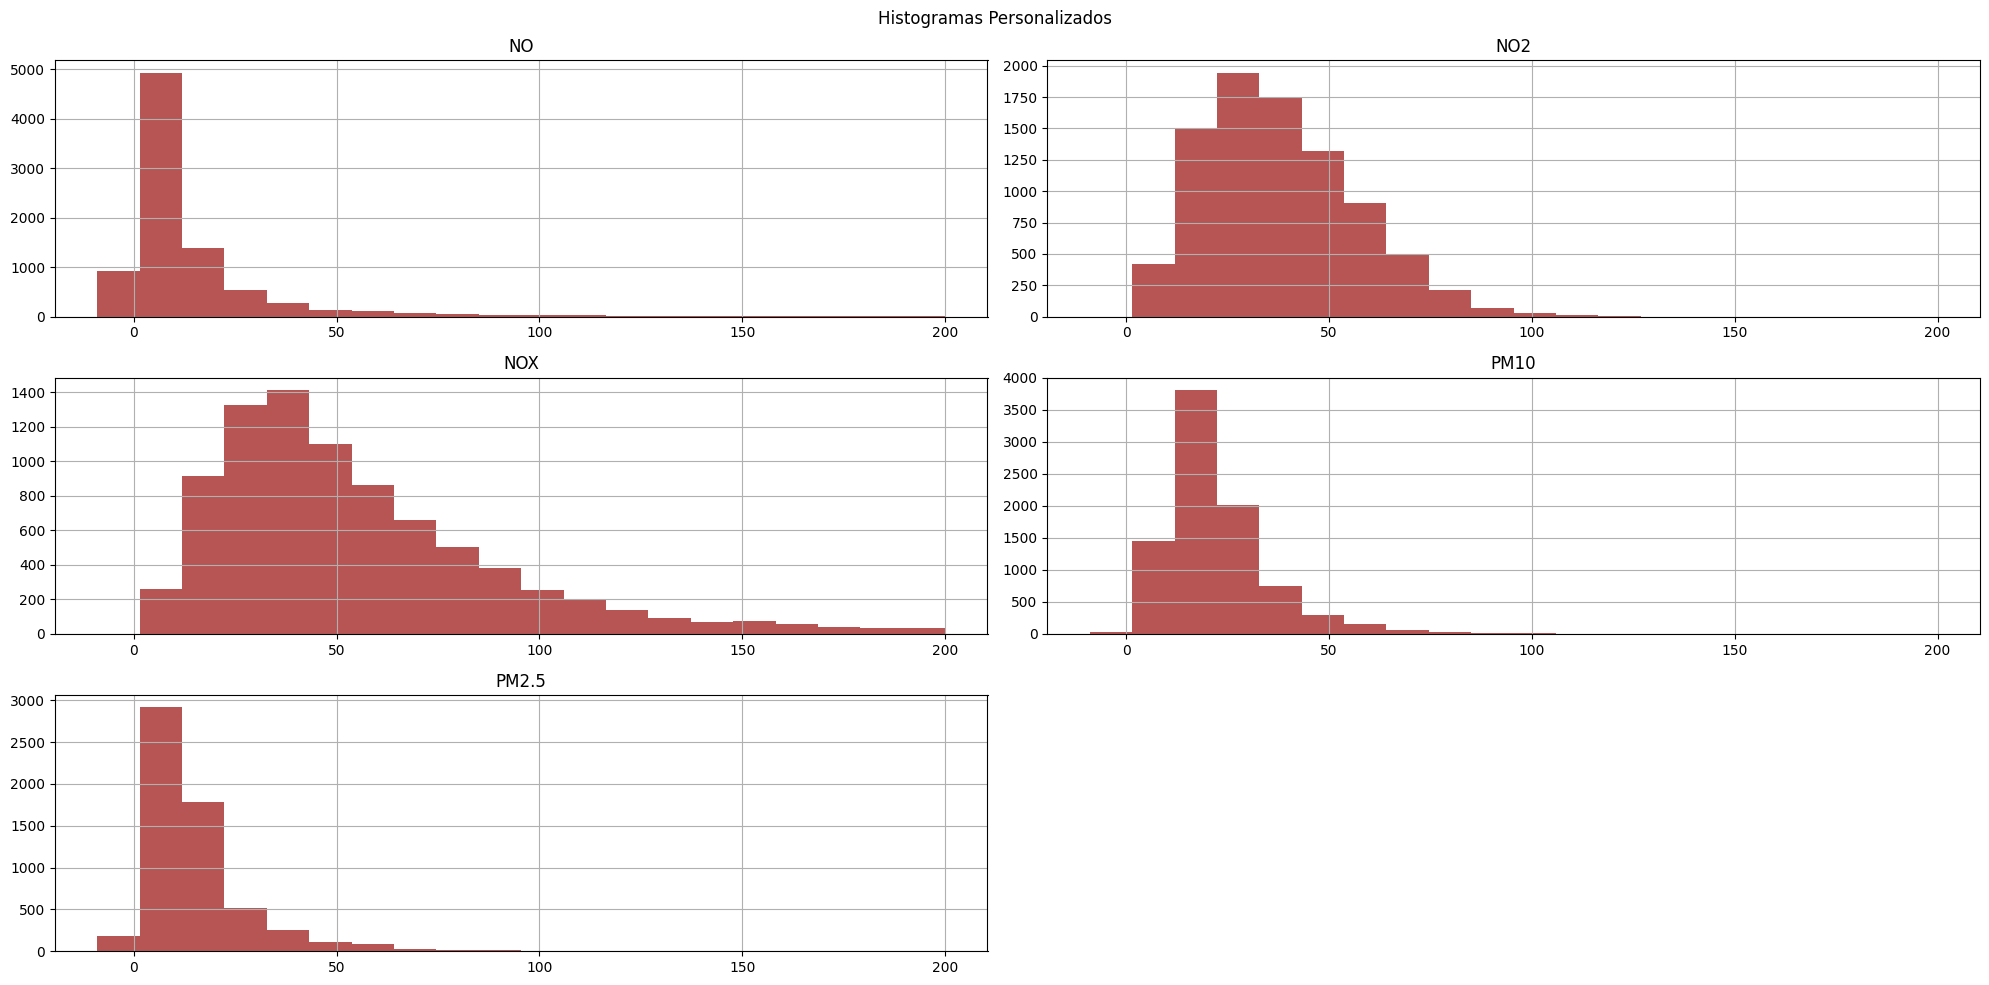

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Personaliza los colores para cada histograma
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown']

# Crea un conjunto de histogramas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10), sharey=True)

# Asegúrate de que haya 9 ejes para 9 histogramas
for ax, color in zip(axes.flatten(), colors):
    pvt_df.hist(alpha=0.8, bins=20, range=[-9, 200], ax=ax, color=color)

# Añade etiquetas y título
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma {i + 1}')

plt.suptitle('Histogramas Personalizados')

# Ajusta la disposición de las gráficas
plt.tight_layout()

# Muestra la figura
plt.show()


In [ ]:
# pvt_df.hist(alpha=0.8, figsize=(20, 10), range=[-9, 740], layout= (3,3))

***RESPUESTA:*** El de mayor variabilidad es el NOx. Como se puede observar, aunque el contaminante NO tiene un pico más alto, no presenta una mayor variabilidad que el NOx. Recordemos que el NOx tiene un promedio de 61.078661 unidades de contaminante..






8.	Se ejecuta el siguiente código y comenta qué hace cada línea:

In [ ]:
# Para leer un archivo CSV desde mi drive
air_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MNA/CyAD/2-Module/Exercise/LaqnData.csv')

In [ ]:
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True) # Se utiliza para dividir la columna 'ReadingDateTime' en dos nuevas columnas utilizando un espacio como separador.

# print(datetime_df.shape)
# print(datetime_df[0]) # Fechas
# print(datetime_df[1]) # Hora

datetime_df.columns = ['Date','Time'] # Asignamos los nombres a las columnas
datetime_df
date_df = datetime_df.Date.str.split('/',expand=True) # Se utiliza para dividir la nueva columna 'Date' del DataFrame datetime_df en tres nuevas columnas utilizando el carácter '/' como separador.
date_df.columns = ['Day','Month','Year']  # Asignamos los nombres a las columnas
date_df # Mostramos el Data Frame

air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
# air_df.join(date_df): Para unir el DataFrame date_df al DataFrame air_df, en función de sus índices o columnas. Esto agrega las columnas de año, mes y día al DataFrame air_df.
# .join(datetime_df.Time): Esto agrega la columna de tiempo al DataFrame air_df.
# .drop(columns=['ReadingDateTime', 'Year']): Finalmente, se eliminan las columnas 'ReadingDateTime' y 'Year' del DataFrame air_df utilizando el método drop().

air_df = air_df.set_index(['Month','Day','Time','Species']) # Para establecer un índice multinivel en el DataFrame
air_df

Site  Value   Units Provisional or Ratified
Month Day Time  Species                                            
01    01  00:00 NO       CT3    3.5  ug m-3                       R
          01:00 NO       CT3    3.6  ug m-3                       R
          02:00 NO       CT3    2.2  ug m-3                       R
          03:00 NO       CT3    2.1  ug m-3                       R
          04:00 NO       CT3    3.3  ug m-3                       R
...                      ...    ...     ...                     ...
12    31  19:00 PM2.5    CT3   -2.0  ug m-3                       R
          20:00 PM2.5    CT3    6.0  ug m-3                       R
          21:00 PM2.5    CT3    5.0  ug m-3                       R
          22:00 PM2.5    CT3    5.0  ug m-3                       R
          23:00 PM2.5    CT3    6.0  ug m-3                       R

[43800 rows x 4 columns]

9. Ejecuto la siguiente instrucción y comparo su salida con la del código anterior (ejercicio 8). Para analizar si ¿Son iguales?

In [ ]:
air_df.unstack()

Site                      Value                          \
Species           NO  NO2  NOX PM10 PM2.5    NO   NO2   NOX  PM10 PM2.5   
Month Day Time                                                            
01    01  00:00  CT3  CT3  CT3  CT3   CT3   3.5  30.8  36.2  35.7   NaN   
          01:00  CT3  CT3  CT3  CT3   CT3   3.6  31.5  37.0  28.5   NaN   
          02:00  CT3  CT3  CT3  CT3   CT3   2.2  27.3  30.7  22.7   NaN   
          03:00  CT3  CT3  CT3  CT3   CT3   2.1  23.5  26.8  20.5   NaN   
          04:00  CT3  CT3  CT3  CT3   CT3   3.3  28.0  33.0  22.1   NaN   
...              ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
12    31  19:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.5  16.3  -2.0   
          20:00  CT3  CT3  CT3  CT3   CT3   0.7  17.5  18.6  14.5   6.0   
          21:00  CT3  CT3  CT3  CT3   CT3   0.7  14.1  15.1   8.6   5.0   
          22:00  CT3  CT3  CT3  CT3   CT3   1.1  22.0  23.6  12.5   5.0   
          23:00  CT3  CT3  CT3  CT3   CT3   0.9  19.4  20.7  10.4   6.0   

                  Units                                        \
Species              NO     NO2            NOX   PM10   PM2.5   
Month Day Time                                                  
01    01  00:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          01:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          02:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          03:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          04:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
...                 ...     ...            ...    ...     ...   
12    31  19:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          20:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          21:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          22:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   
          23:00  ug m-3  ug m-3  ug m-3 as NO2  ug/m3  ug m-3   

                Provisional or Ratified                     
Species                              NO NO2 NOX PM10 PM2.5  
Month Day Time                                              
01    01  00:00                       R   R   R    R     R  
          01:00                       R   R   R    R     R  
          02:00                       R   R   R    R     R  
          03:00                       R   R   R    R     R  
          04:00                       R   R   R    R     R  
...                                 ...  ..  ..  ...   ...  
12    31  19:00                       R   R   R    R     R  
          20:00                       R   R   R    R     R  
          21:00                       R   R   R    R     R  
          22:00                       R   R   R    R     R  
          23:00                       R   R   R    R     R  

[8760 rows x 20 columns]

***RESPUESTA:*** Teóricamente, son los mismos, solo que este inciso se empleó la función .unstack() lo cual es una operación multinivel. Con esto su subió una columna como índice. Para revertir esto se puede emplear .stack().